# Notebook **Two** - Searching for spectroscopic observations of BCG candidates

This notebook contains everything necessary for you to work on the second step of this project - searching for spectroscopic observations of the **BCG candidates** that you identified in the first step. We have a lot of large surveys made up of photometric data **-** images taken with different filters that block light unless it is within a particular wavelength range **-** but as spectroscopic observations have to be targeted at specific objects, and generally exposed for longer, they are less common. 

On the other hand, there have been some large surveys that took spectra of many galaxies - we will be searching these to see if we can identify observations of the BCG candidates that you identified. Having a spectrum of an object lets us take a much more detailed look at exactly what physical processes are going on inside it, and they also provide very reliable redshift measurements - confirming the redshift of a galaxy cluster from a spectrum of its BCG makes you much more confident that the properties you measure for the overall cluster are correct.
 
**Galaxy clusters** are single, gravitationally bound, objects made up of a **lot** of dark matter, quite a lot of hot gas (which is what emits X-rays), and the galaxies themselves (there are other components, but they don't matter right now).

**A BCG** is the most massive, brightest, galaxy in a cluster (though there can be multiple BCGs, or no obvious BCG at all).

**What will we get out of this stage of the project?**

* Spectroscopic redshifts for our BCG candidates, which are much more accurate and trustworthy than 'photometric' redshifts (though photometric methods have the significant advantage of being measurable from very large surveys of the sky, spectroscopic redshifts are much more observationally expensive).
* From those BCG candidate spectroscopic redshifts, we have a much more reliable idea of the redshift of the galaxy cluster as a whole.
* This lets us very easily search for nearby galaxies at very similar redshifts (i.e. members of the cluster!) - the miniscule differences in member galaxy spectroscopic redshifts to BCG redshifts let us measure the member galaxy velocity dispersion ($\sigma_{\nu}$), which traces the gravitational potential of the cluster!
* Spectra also tell us about the galaxies themselves - for the BCGs we should be able to constrain a **different** velocity dispersion, that of the stars in the galaxy (stellar velocity dispersion), which tells us about the mass of the BCGs.
* We can also try to constrain the age and mass of the stellar populations in the galaxies.
* Finally, optical spectra can help an uncommon type of BCG with strong emission lines - these emission lines are not always seen in elliptical galaxies, and indicate either strong star formation or an active central super-massive black hole!

## Import statements and reading history/sample

In [1]:
%matplotlib ipympl

from ident_run_setup import cosmo, side_length, HISTORY_FILE_PATH, load_history, proj_name, update_history
from interactive_spec_search import SpecSearch

from xga.products import Image

from astropy.wcs import WCS
from astropy.units import Quantity
from astropy.visualization import MinMaxInterval, LogStretch
from astropy.coordinates import SkyCoord
import matplotlib
from matplotlib import pyplot as plt
# from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

%matplotlib ipympl

The framework I've designed for this process (i.e. these notebooks) is trying to keep a useful history of the process - it has recorded the images that we were able to download or generate, and the BCG candidates you identified - here it will be keeping a record of the spectra you think are associated with each BCG candidate.

**This step will NOT produce an output csv file, as it isn't really a good format to store these results in (each BCG candidate can have multiple spectra, which doesn't really work in the 2D data storage of a csv) - as such to backup these results you should download the 'bcg_ident_proj_save.json' file, which is in the history directory.** 

In [2]:
cur_history = load_history()

We read the base **galaxy cluster** sample file into a Pandas dataframe:

In [3]:
# This reads the 'comma separated variable', or CSV/csv, file (which contains information about the sample of clusters
#  being investigated), from disk (on the hard-disk drive\HDD, or solid state disk\SSD) into memory (a much faster form of storage 
#  called Random Access Memory\RAM, where files being used by the operating system or currently running software live). We are using 
#  a Python module called 'Pandas' to read it in - think of it almost like a Python version of Excel
samp = pd.read_csv(cur_history['static_samp_file'])
# This method shows the top two lines of the loaded-in sample file
samp.head(2)

,LoVoCCSID,common_name,cent_im_ra,cent_im_dec,redshift,MCXC_R500,MCXC_RA,MCXC_DEC,manual_xray_ra,manual_xray_dec,MCXC_Lx500_0.1_2.4,name,ang_prop_ratio
0,1,A2029,227.7343,5.745471,0.0766,1.3344,227.73,5.72,227.7343,5.745471,8.726709e+44,LoVoCCS-1,86.035164
1,2,A401,44.7400,13.580000,0.0739,1.2421,44.74,13.58,NaN,NaN,6.088643e+44,LoVoCCS-2,83.258258


All cluster names:

In [4]:
print(list(samp['name'].values))

['LoVoCCS-1', 'LoVoCCS-2', 'LoVoCCS-4A', 'LoVoCCS-4B', 'LoVoCCS-5', 'LoVoCCS-7', 'LoVoCCS-9', 'LoVoCCS-10', 'LoVoCCS-11', 'LoVoCCS-12', 'LoVoCCS-13', 'LoVoCCS-14', 'LoVoCCS-15', 'LoVoCCS-18', 'LoVoCCS-21', 'LoVoCCS-22', 'LoVoCCS-24', 'LoVoCCS-26', 'LoVoCCS-27', 'LoVoCCS-28', 'LoVoCCS-29', 'LoVoCCS-30', 'LoVoCCS-31', 'LoVoCCS-33', 'LoVoCCS-35', 'LoVoCCS-39', 'LoVoCCS-41A', 'LoVoCCS-41B', 'LoVoCCS-41C', 'LoVoCCS-42', 'LoVoCCS-45', 'LoVoCCS-46A', 'LoVoCCS-46B', 'LoVoCCS-46C', 'LoVoCCS-48A', 'LoVoCCS-48B', 'LoVoCCS-49', 'LoVoCCS-51', 'LoVoCCS-55', 'LoVoCCS-58', 'LoVoCCS-60A', 'LoVoCCS-60B', 'LoVoCCS-61', 'LoVoCCS-63', 'LoVoCCS-65', 'LoVoCCS-66A', 'LoVoCCS-66B', 'LoVoCCS-67', 'LoVoCCS-74', 'LoVoCCS-75', 'LoVoCCS-76', 'LoVoCCS-80', 'LoVoCCS-85', 'LoVoCCS-89', 'LoVoCCS-90', 'LoVoCCS-93A', 'LoVoCCS-93B', 'LoVoCCS-94', 'LoVoCCS-98', 'LoVoCCS-99', 'LoVoCCS-108', 'LoVoCCS-119', 'LoVoCCS-121', 'LoVoCCS-122', 'LoVoCCS-123', 'LoVoCCS-131', 'LoVoCCS-134']


## A CAVEAT

For technical reasons that I won't explain here, the only to get this interactive plot process working in Jupyter Notebooks (in its current form at least) is to run the notebook for one cluster, then restart it and run it again for the next, and so on.

This stepping through of clusters will happen automatically - once the project history has entries for BCG candidate spectra from your investigation, the next time the notebook is run it will move on to the next cluster whose BCG candidates don't have spectra. If you want to go back to a specific cluster and overwrite your first attempt, you can set the variable below to the cluster name (e.g. 'SDSSXCS-124', make sure the name is a string with the '' around it) - **before you run the notebook again, make sure to set `overwrite_cluster=None`, and note that None doesn't have any '' around it, as it is not a string**

In [5]:
# You can change this per the instructions above
overwrite_cluster = 'LoVoCCS-122'

# Don't change this though
if overwrite_cluster is not None and overwrite_cluster not in samp['name'].values:
    raise ValueError("The overwriting cluster name you set does not correspond to a name in the sample, check "\
                     "to make sure you typed it correctly!")

# Also don't change this, which I can set to make the automatic next cluster selection start from a 
#  particular point, rather than the beginning
start_cluster = None

Here we identify the next cluster that doesn't have any recorded spectroscopic searches for candidate BCGs, which will be the next one you'll work on - this makes use of the 'history' that is being written as you go through the sample.

In [6]:
# Here we use the 'complete' flag stored in the BCG candidate spectrum history to measure the number of clusters
#  for which the BCG candidate process is complete
# A bit of a silly step to just extract the 'ident_complete' info from the dictionaries of particular clusters, but have to be
#  careful as they could have other entries (like BCG info for instance)
just_complete = {n: {'bcg_cand_ident_complete': cur_history['bcg_identification'][n]['ident_complete'],
                     'spec_ident_complete': cur_history['bcg_spec_identification'][n]['ident_complete']} 
                 for n in cur_history['bcg_spec_identification']}
# Also consider any cluster marked as having no BCG candidates completed so far as spectrum identification
for n in just_complete:
    if 'no_bcg' in cur_history['bcg_identification'][n] and cur_history['bcg_identification'][n]['no_bcg']:
        just_complete[n]['spec_ident_complete'] = True

ident_comp_df = pd.DataFrame(just_complete).T
# This dataframe may be modified, so we make a copy of the original for safety
og_ident_comp_df = ident_comp_df.copy()
num_bcg_comp = ident_comp_df['spec_ident_complete'].sum()

# Show a quick progress update on identifying the BCG spectra
print('BCG candidate spectrum identification is {p}% complete.'.format(p=round((num_bcg_comp/cur_history['num_clusters'])*100, 2)))

# If the notebook has been configured to start the iteration process at a cluster other than the first, we 
#  have to account for that
if start_cluster is not None:
    new_start_ind = np.argwhere(ident_comp_df.index == start_cluster)[0][0]
    ident_comp_df = ident_comp_df[np.arange(0, len(ident_comp_df)) >= new_start_ind]

if overwrite_cluster is None:
    # Finds the first cluster with a 'False' value in the 'ident_complete' column - though only if you haven't
    #  set an overwriting cluster name above
    cur_name = ident_comp_df.loc[~ident_comp_df['spec_ident_complete']].index[0]
else:
    cur_name = overwrite_cluster

# Now we read out the relevant row of the sample table
cur_row = samp[samp['name'] == cur_name].iloc[0]
if not og_ident_comp_df.loc[cur_name]['bcg_cand_ident_complete']:
    raise ValueError("This tool cannot be run for a cluster ({n}) without identified BCG candidates.".format(n=cur_name))

cur_row

BCG candidate spectrum identification is 100.0% complete.


LoVoCCSID                                                         122
common_name                                                     A1023
cent_im_ra                                                      157.0
cent_im_dec                                                      -6.8
redshift                                                       0.1176
MCXC_R500                                                      0.8553
MCXC_RA                                                         157.0
MCXC_DEC                                                         -6.8
manual_xray_ra                                                    NaN
manual_xray_dec                                                   NaN
MCXC_Lx500_0.1_2.4    109594100000000024683092227758817660339486720.0
name                                                      LoVoCCS-122
ang_prop_ratio                                             126.139311
Name: 63, dtype: object

## Searching for spectroscopic observations of BCG candidates

Having spectroscopic data for a given object is much less common than having a photometric observation - primarily because photometric data (i.e. images) can be easily taken at scale, for large swathes of the sky. In fact, surveys over the last thirty years (and before that) have been doing just that, and we can now reasonably expect that there will be some image taken of most nearby (which clusters generally are, relatively speaking) objects that we might be interested in.

Spectroscopic observations, on the other hand, have to be targeted at specific objects, and require more complex (in some ways) instruments than photometric observations. They also have to be exposed for longer, which slows down the rate at which you can take spectroscopic data for large samples of objects. As such, while large photometric surveys detect hundreds of millions of stars and galaxies, there are 'only' of order 20 million spectra available (SDSS for instance, identified ~230 million objects photometrically, and got spectra for ~4 million of them). 

Still, you are going to use the relatively large spectroscopic surveys that are available to try and find spectra of the BCG candidates. Specifically, this tool can currently search for spectra from:

* 6dF
* 2dF
* SDSS
* eBOSS
* Hectospec
* LAMOST
* GAMA
* FAST
* DESI DR1

These surveys take/took spectra of different qualities, and not all will be suitable for some of the analyses we wish to perform - **however** they will all give us relatively reliable redshifts.


**What will you be doing?**

1. Previously identified BCG candidates are indicated with a large-ish white pentagon - **if you identified multiple candidates, only one will be shown on the image at once.**
2. Spectra of objects within the image you are shown are indicated with circles of different colors - the legend at the bottom of the left-hand axis matches those colors to the survey each spectrum was taken from. **The radius of these circles does not represent the portion of sky that was observed for the spectrum**.
3. **Your job is to identify whether the galaxies you identified as BCG candidates have spectroscopic data**.
4. You should do this by using the zoom button on the plot's toolbar, and seeing if there are any circles centered on the BCG candidates you identified - **be aware that there might be slightly overlapping spectra indicated by circles that are very nearby, but clearly centered on another object - we _don't_ want to select those.**
5. Not all of the candidates will have spectral observations! We'll come back to this later on.
6. If you think you have identified a spectrum for a candidate, click on the circle (it is possible that there are multiple spectra from different surveys, and sometimes all the circles are on top of each other - **when you click you will select all spectra with circles that overlap _where_ you click**).
7. Selecting a spectrum (or spectra) will cause it to be plotted on the right-hand axis - **this may take a second, as they have to be downloaded - be patient!**. If there are multiple spectra, don't be too alarmed if the normalisation of (e.g. the y-axis values) are quite different from one another. In those cases you may need to use the toolbar zoom tool on the spectrum axis to be able to see the shape of some spectra.
8. Examine the spectrum plots and see if they look at all like the BCG spectra you've already seen - **make a note if they look strange to you, particularly if there are strong emission lines, those ones are interesting!** You may notice that some spectra look bad (i.e. they are jumping up and down in flux values without looking like a spectrum) at the lowest and highest wavelengths - that generally means that the observation quality is low, but they should still be useful.
9. Once you're happy that that you have identified spectroscopic data of the candidate (and you think the spectrum looks consistent with a BCG), you can click the save button. The white pentagon highlighting the BCG candidate should disappear, and if there is another candidate the pentagon will have moved there (you may need to hit the home button on the toolbar to see the whole image again). If there are no more candidates, a message will be displayed at the top of the tool.
10. **If you didn't find any spectra for a BCG candidate, hit the exclamation mark button in the toolbar, and that information will be recorded.** Also, if you have accidentally hit save at any point, you can click the refresh button in the toolbar, and that will wipe the stored information for the current __cluster__.

***After each session (not after every cluster) of identifying BCG candidate spectra you should back-up the project history save file (a .json) in the history directory.***

### Loading/setting up images

#### DESI Legacy Survey (optical/near-infrared)

In [7]:
desi_ls_pth = cur_history['data_operations'][cur_name]['raw_images']['desi-ls']['im_path']
desi_ls_data = np.flip(plt.imread(desi_ls_pth), axis=0)

ls_wcs = WCS(naxis=2)
ls_cen = cur_history['data_operations'][cur_name]['raw_images']['desi-ls']['cen_pos']

ls_pix_scale = cur_history['data_operations'][cur_name]['raw_images']['desi-ls']['arcsec_per_pix']
ls_wcs.wcs.cdelt = [-1*(ls_pix_scale/3600), ls_pix_scale/3600]
ls_wcs.wcs.crpix = [desi_ls_data.shape[0]/2, desi_ls_data.shape[1]/2]
ls_wcs.wcs.crval = [ls_cen[0], ls_cen[1]]
ls_wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']

In [8]:
cand_coords = [Quantity(cc['desi-ls_pos'], 'deg') for n, cc in cur_history['bcg_identification'][cur_name].items() 
               if 'BCG' in n]

# Here there is something wrong, and we cannot continue
if len(cand_coords) == 0:
    rel_entry = cur_history['bcg_spec_identification'][cur_name]
    rel_entry['ident_complete'] = True
    cur_history['bcg_spec_identification'][cur_name] = rel_entry
    update_history(cur_history)

    raise ValueError("There are not BCG candidate coordinates for {n}, we cannot continue - marking "
                     "spectrum identification as complete.".format(n=cur_name))
    
cand_coords

[<Quantity [156.99440446,  -6.7989222 ] deg>]

In [9]:
im_data = {'desi-ls': desi_ls_data}
im_wcs = {'desi-ls': ls_wcs}

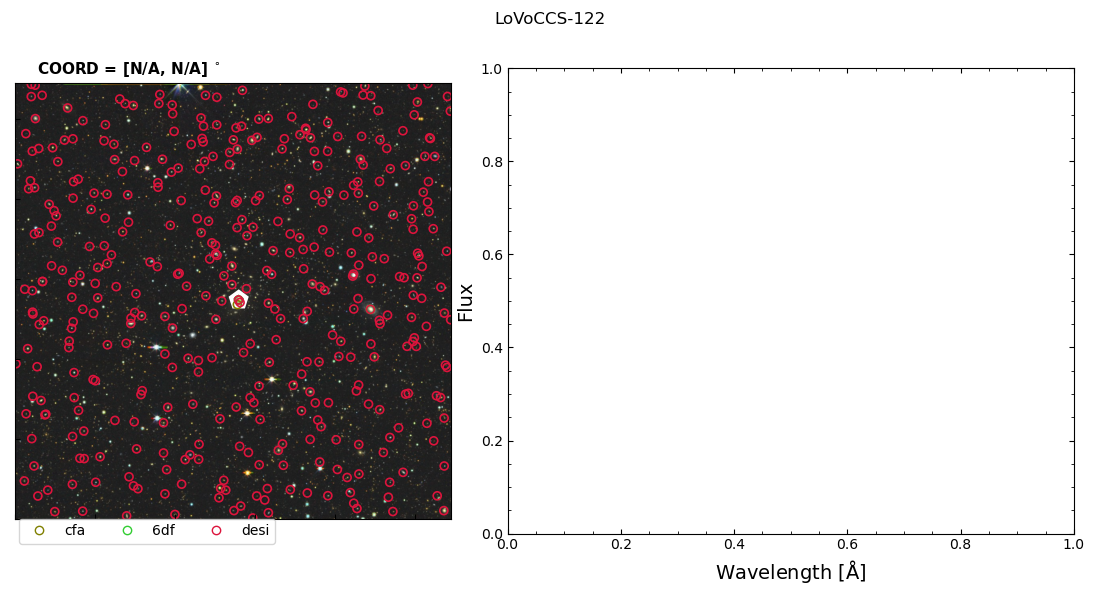

In [10]:
cur_sp = SpecSearch(im_data, im_wcs, 'desi-ls', cur_name, cand_coords, figsize=(11, 6), im_spec_ratio=[1, 1.3], 
                    default_smooth_spec=5)